**Nota: Se ha identificado un error en el archivo "fming", por lo que se adjunta la versión corregida en un archivo .zip dentro de la tarea.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
#suppress warnings
warnings.filterwarnings('ignore')

import scipy.io
from sklearn import metrics


In [2]:
# from google.colab import drive

# drive.mount('/content/drive')

# %pwd
# %cd "/content/drive/MyDrive/Colab Notebooks/Aprendizaje Computacional/TallerDos"
# %pwd

In [3]:
from RandParametros import randParametros
from fming import fmincg
from organizarBeta import organizarBeta
from sigmoid import sigmoid
from sigmoidGradiente import sigmoidGradiente

In [4]:
mat = scipy.io.loadmat('datos4.mat')
x_data = mat['X']; #5000 X 400
y_data = mat['y']; #5000 X 1
#print(x_data[0,:])

[10]


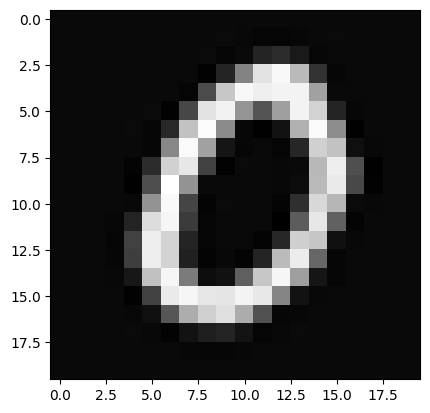

In [5]:
cont = 0
DatSetImage = np.zeros((20,20))
ImageNumber = 300

for i in range(20):
  for j in range(20):
    DatSetImage[j,i] = x_data[ImageNumber,cont]
    cont+=1

plt.imshow(DatSetImage,cmap='gray')
print(y_data[ImageNumber])

In [6]:
#Dividir datos en Entrenamiento en 70% y 30%
x_data_30 = np.zeros((0, x_data.shape[1]))
y_data_30 = np.zeros((0, y_data.shape[1]))

x_data_70 = np.zeros((0, x_data.shape[1]))
y_data_70 = np.zeros((0, y_data.shape[1]))

for i in range(0, x_data.shape[0], 500):
    x_data_30 = np.vstack((x_data_30, x_data[i:i+int(0.3*500), :]))
    x_data_70 = np.vstack((x_data_70, x_data[i+int(0.3*500):i+500, :]))

for i in range(0, y_data.shape[0], 500):
    y_data_30 = np.vstack((y_data_30, y_data[i:i+int(0.3*500), :]))
    y_data_70 = np.vstack((y_data_70, y_data[i+int(0.3*500):i+500, :]))

In [7]:
Beta1_grad = 0
Beta2_grad = 0

tamano_capa_entrada  = 400
tamano_capa_media = 25
num_salidas =  10

In [8]:
Beta1_inicial = randParametros(tamano_capa_entrada,tamano_capa_media);
Beta2_inicial = randParametros(tamano_capa_media, num_salidas);
parametros_Beta_Iniciales = np.concatenate((Beta1_inicial, Beta2_inicial),axis=None)
#print(parametros_Beta_Iniciales)
parametros_Beta_Iniciales = np.reshape(parametros_Beta_Iniciales,(parametros_Beta_Iniciales.shape[0],))
#print(parametros_Beta_Iniciales)

In [9]:
[Beta1,Beta2] = organizarBeta(tamano_capa_media,tamano_capa_entrada,num_salidas,parametros_Beta_Iniciales)

In [10]:
#Esta celda debe ser finalizada
def nnFunction1(nn_params,tamano_capa_entrada,tamano_capa_media,num_salidas, x, y, Lambda, m):

    [Beta1,Beta2] = organizarBeta(tamano_capa_media,tamano_capa_entrada,num_salidas,nn_params)

    # Inicializar acumuladores de gradientes
    Beta1_grad = np.zeros_like(Beta1)
    Beta2_grad = np.zeros_like(Beta2)

    acum1 = np.zeros_like(Beta1.T) #401x25
    acum2 = np.zeros_like(Beta2.T) #26x10

    J = 0

    for t in range(m):
        #Propagacion hacia adelante
        x1 = x[t,:] #(400,)
        a1 = np.concatenate((np.array([1]), x1))  #(401,)
        z2 = np.dot(Beta1, a1)
        a2 = np.concatenate((np.array([1]), sigmoid(z2)))  # Añadir el término de sesgo, 1 X (tamano_capa_media + 1)
        z3 = np.dot(Beta2, a2)
        a3 = sigmoid(z3)

        #Paso intermedio
        y_vector = np.zeros(num_salidas)
        pos = y[t]
        if(pos == 10):
          pos = 0

        if(type(pos) == np.ndarray):
          y_vector[int(pos[0])] = 1
        else:
          y_vector[(pos)] = 1

        #Propagacion hacia atras
        delta3 = a3 - y_vector  # Calcular el error en la capa de salida
        delta2 = np.multiply(np.dot(Beta2[:,1:].T, delta3),sigmoidGradiente(z2))

        #Acumuladores
        a1 = a1.reshape(-1, 1)
        acum1 += a1 * delta2

        a2 = a2.reshape(-1, 1)
        acum2 += a2 * delta3

        #Funcion cost(J) parte 1
        A = np.sum((np.multiply(y_vector, np.log(a3))) + ((np.multiply((1- y_vector), np.log(1 - a3)))))
        J = J + A

    #Funcion cost(J) parte 2
    sum1 = np.sum(np.sum(Beta1[:, 1:]**2))
    sum2 = np.sum(np.sum(Beta2[:, 1:]**2))

    J = ((-1/m) * J) + (Lambda / (2 * m)) * (sum1 + sum2)

    #Calculamos gradientes
    Temp_Beta1 = np.copy(Beta1)
    Temp_Beta1[:,0] = 0
    Beta1_grad = (1/m) * (acum1.T + Lambda * Temp_Beta1)

    Temp_Beta2 = np.copy(Beta2)
    Temp_Beta2[:,0] = 0
    Beta2_grad = (1/m) * (acum2.T + Lambda * Temp_Beta2)

    grad = np.concatenate((Beta1_grad,Beta2_grad),axis=None)

    grad = np.concatenate((Beta1_grad.flatten(), Beta2_grad.flatten()))
    retornar = [J, grad]
    return retornar

In [11]:
#Celda de prueba

Lambda = 1
m = len(x_data_70)
retornar = nnFunction1(parametros_Beta_Iniciales, tamano_capa_entrada, tamano_capa_media, num_salidas, x_data_70, y_data_70, Lambda, m)
print(retornar[0])

7.033567768289158


In [12]:
m = len(x_data_70)  # o m = len(y_data_30) si tienen la misma longitud
print("Valor de m:", m)
def costFuncition(p):
    ret = nnFunction1(p, tamano_capa_entrada, tamano_capa_media, num_salidas, x_data_70, y_data_70, Lambda, m)
    return ret

Valor de m: 3500


In [13]:
options = {'maxiter' : 50}
Lambda = 0.1
parametros_Beta_Finales = fmincg(costFuncition,parametros_Beta_Iniciales,options)

Iteration 1 | Cost: 3.258786 
Iteration 2 | Cost: 3.232642 
Iteration 3 | Cost: 3.164643 
Iteration 4 | Cost: 2.899758 
Iteration 5 | Cost: 2.449304 
Iteration 6 | Cost: 2.158729 
Iteration 7 | Cost: 1.923625 
Iteration 8 | Cost: 1.807985 
Iteration 9 | Cost: 1.631480 
Iteration 10 | Cost: 1.576705 
Iteration 11 | Cost: 1.493603 
Iteration 12 | Cost: 1.426823 
Iteration 13 | Cost: 1.364280 
Iteration 14 | Cost: 1.254572 
Iteration 15 | Cost: 1.129770 
Iteration 16 | Cost: 1.086206 
Iteration 17 | Cost: 1.054899 
Iteration 18 | Cost: 1.026389 
Iteration 19 | Cost: 0.985701 
Iteration 20 | Cost: 0.967972 
Iteration 21 | Cost: 0.952371 
Iteration 22 | Cost: 0.926864 
Iteration 23 | Cost: 0.885106 
Iteration 24 | Cost: 0.864367 
Iteration 25 | Cost: 0.815730 
Iteration 26 | Cost: 0.786840 
Iteration 27 | Cost: 0.768470 
Iteration 28 | Cost: 0.745556 
Iteration 29 | Cost: 0.733354 
Iteration 30 | Cost: 0.694447 
Iteration 31 | Cost: 0.648960 
Iteration 32 | Cost: 0.609673 
Iteration 33 | Co

In [14]:
[Beta1,Beta2] = organizarBeta(tamano_capa_media,tamano_capa_entrada,num_salidas,parametros_Beta_Finales)
#print(len(parametros_Beta_Finales))
#print(Beta2)

In [15]:
#Cálcular Matriz de Confusión con el 30% de los datos

# Después de la corrección del problema con el índice t en el bucle

m = len(x_data_30)
# Calcular las predicciones para el conjunto de datos de prueba (30%)
conf_matrix = np.zeros((num_salidas, num_salidas), dtype=int)  # Lista para almacenar las predicciones
for t in range(m):  # Iterar sobre los datos de prueba
    # Propagación hacia adelante
    x1 = x_data_30[t,:]  # Asegúrate de que el índice t sea válido para x_data_30
    a1 = np.concatenate((np.array([1]), x1))
    z2 = np.dot(Beta1, a1.T)
    a2 = np.concatenate((np.array([1]), sigmoid(z2)))

    z3 = np.dot(Beta2, a2)
    a3 = sigmoid(z3)

    # Obtener la clase predicha y la clase real
    predicted_class = int(np.argmax(a3))
    pos = y_data_30[t]
    if(pos == 10):
        pos = 0

    true_class = int(pos)

    # Almacenar la clase real y la clase predicha
    conf_matrix[predicted_class, true_class] += 1

# print("Matriz de Confusión:")
# print(conf_matrix)


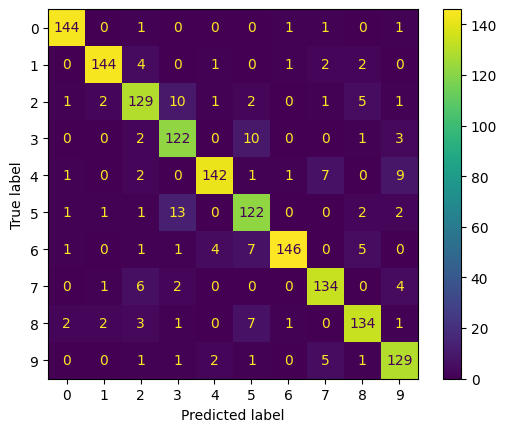

In [16]:
# Visualizar la matriz de confusión
cm_display = metrics.ConfusionMatrixDisplay(conf_matrix)
cm_display.plot()
plt.show()

5. Siguiendo como ejemplo el código de la figura 1, escriba las líneas de código
que utilizaría para representar el modelo de la red neuronal implementada en el
punto 1.1., en términos de funciones de la librería Keras de TensorFlow (1
punto)

2024-04-16 00:23:48.085032: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 00:23:48.249402: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-16 00:23:48.884884: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 00:23:50.299139: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8584 - loss: 0.4912 - val_accuracy: 0.9560 - val_loss: 0.1464
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9534 - loss: 0.1560 - val_accuracy: 0.9681 - val_loss: 0.1046
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9676 - loss: 0.1084 - val_accuracy: 0.9743 - val_loss: 0.0822
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9734 - loss: 0.0893 - val_accuracy: 0.9756 - val_loss: 0.0787
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9743 - loss: 0.0805 - val_accuracy: 0.9779 - val_loss: 0.0745
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9741 - loss: 0.0889
Pérdida en el conjunto de prueba: 0.07451599091291428
Precisión en el conjunto de prueba: 0.9779000282287598
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


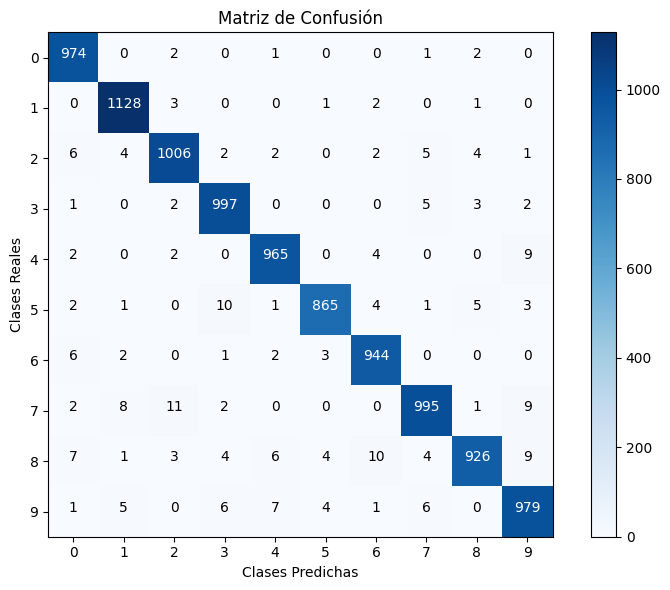

In [17]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Importar el conjunto de datos MNIST
mnist = tf.keras.datasets.mnist
(x_data_70, y_data_70), (x_data_30, y_data_30) = mnist.load_data()

# Normalizar los datos
x_data_70, x_data_30 = x_data_70 / 255.0, x_data_30 / 255.0

# Definir el modelo
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo y guardar el historial
history = model.fit(x_data_70, y_data_70, epochs=5, validation_data=(x_data_30, y_data_30))

# Evaluar el modelo
loss, accuracy = model.evaluate(x_data_30, y_data_30)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

# Realizar predicciones
y_pred = np.argmax(model.predict(x_data_30), axis=-1)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_data_30, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Clases Predichas')
plt.ylabel('Clases Reales')
plt.tight_layout()
for i, j in ((i,j) for i in range(10) for j in range(10)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')
plt.show()